# Store Sales - Time Series Forecasting

Predicts the unit sales for thousands of items sold at different Favorita stores.

## Loading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import random

## Loading Data

In [3]:
data=pd.read_csv('Superstore.csv',index_col="Order ID")
data.head(3)

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
CA-2016-152156,2,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
CA-2016-138688,3,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
data.shape

(9994, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, CA-2016-152156 to CA-2017-119914
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int

Seems like no null values found in the given dataset


In [6]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

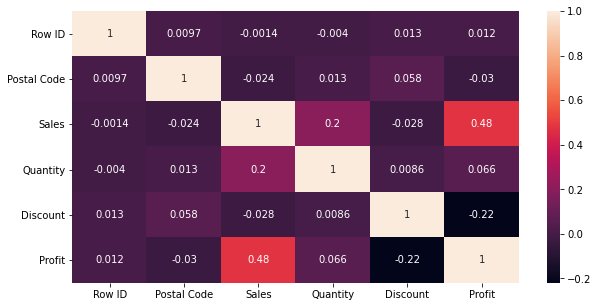

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(),annot=True)

In [8]:
#parsing dates
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])


### Insight 1:  Yearly Profit

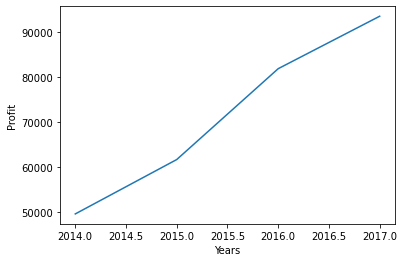

In [9]:
yearlyprofit = data.groupby(data["Order Date"].dt.year)["Profit"].sum()
plt.plot(yearlyprofit)

plt.xlabel('Years')
plt.ylabel('Profit')
plt.show()


The above illustrations shows that the store is in Profit every year

    2014    49543.9741

    2015    61618.6037

    2016    81795.1743

    2017    93439.2696

### Insight 2:  Monthly Profit


In [10]:
d2 = data.copy()

def plotMonth(var):
    print(f"\n\n {str(var).upper()}")
    yearlyData = d2[d2["Order Date"].dt.year == var]
    monthlyProfit = yearlyData.groupby(yearlyData["Order Date"].dt.month)["Profit"].sum()
    months = {1:"Jan",2: "Feb", 3:"Mar", 4:"Apr",5: "May",6: "June",7: "July", 8:"Aug", 9:"Sept",10: "Oct",11: "Nov",12: "Dec"}
    plt.plot(months.values(),monthlyProfit,color="orange")
    plt.xlabel('Months')
    plt.ylabel('Profit')
    plt.title("Monthly Profit")
    plt.show()
    for x in range(1,len(months)+1):
        print("{:6} {}".format(months[x],round(monthlyProfit[x],2)))




 2016


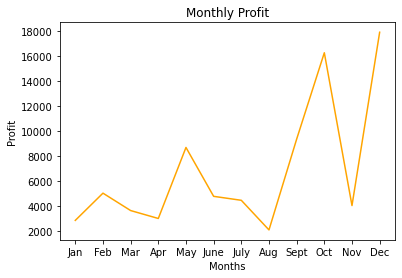

Jan    2824.82
Feb    5004.58
Mar    3611.97
Apr    2977.81
May    8662.15
June   4750.38
July   4432.88
Aug    2062.07
Sept   9328.66
Oct    16243.14
Nov    4011.41
Dec    17885.31


 2015


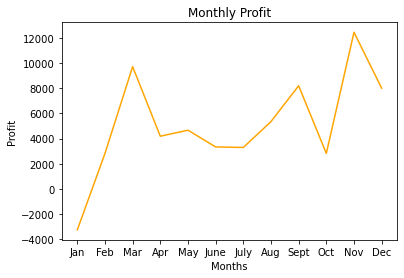

Jan    -3281.01
Feb    2813.85
Mar    9732.1
Apr    4187.5
May    4667.87
June   3335.56
July   3288.65
Aug    5355.81
Sept   8209.16
Oct    2817.37
Nov    12474.79
Dec    8016.97


 2014


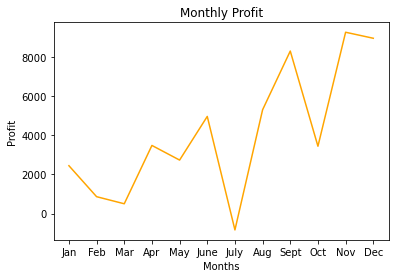

Jan    2450.19
Feb    862.31
Mar    498.73
Apr    3488.84
May    2738.71
June   4976.52
July   -841.48
Aug    5318.1
Sept   8328.1
Oct    3448.26
Nov    9292.13
Dec    8983.57


 2017


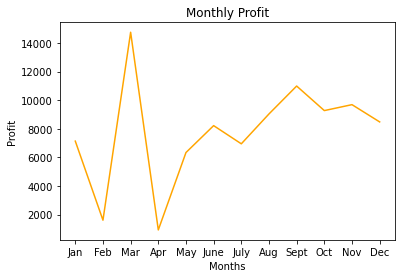

Jan    7140.44
Feb    1613.87
Mar    14751.89
Apr    933.29
May    6342.58
June   8223.34
July   6952.62
Aug    9040.96
Sept   10991.56
Oct    9275.28
Nov    9690.1
Dec    8483.35


In [11]:
for x in list(d2["Order Date"].dt.year.unique()):
    plotMonth(x)


### Insight 3 : Yearly SALES

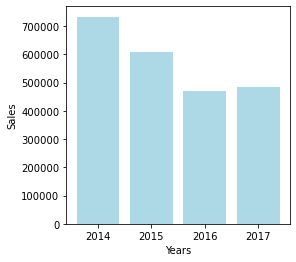

Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


In [11]:
a=data["Order Date"].dt.year.value_counts().index
b=data.groupby(data["Order Date"].dt.year)["Sales"].sum()
#plt.bar(b,list(a))
plt.figure(figsize=(4,4))
plt.bar(a,b,color='lightblue')
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()
print(b)

### Insight 4 : Top Sold Product

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


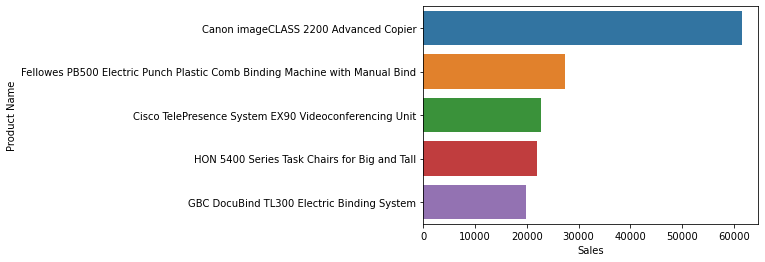

In [25]:
productSales = data.groupby(["Product Name"])["Sales"].sum()
productSales= pd.DataFrame(productSales)
TopSoldProducts = productSales.sort_values(by=["Sales"],ascending=False).head()
TopSoldProducts
sns.barplot(TopSoldProducts["Sales"],TopSoldProducts.index)
plt.show()

### Insight 5 : Least sold product

In [13]:
LeastSold = productSales.sort_values(by=["Sales"],ascending=True).head()
LeastSold

,,Sales
Product ID,Product Name,
OFF-AP-10002203,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
OFF-LA-10003388,Avery 5,5.760
OFF-PA-10000048,Xerox 20,6.480
OFF-EN-10001535,Grip Seal Envelopes,7.072
OFF-AR-10003986,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700


### Insight 6 : Sales per State

In [56]:
import random

def setID(s):
    f= random.randint(1,100)
    return s[:4].upper()
data["State Id"] = data["State"].apply(setID)+data["Country"].apply(setID)


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


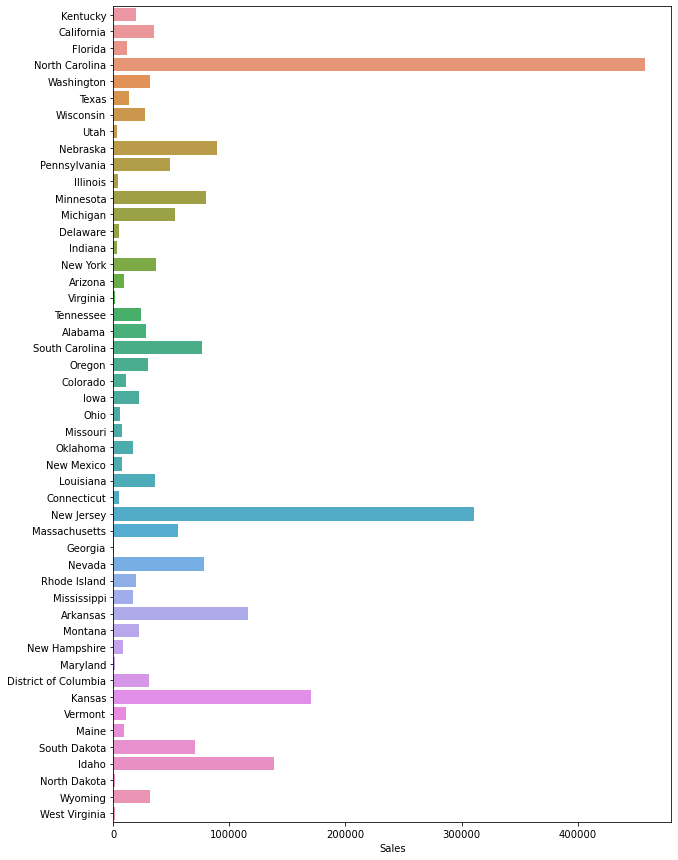

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [33]:
# sales per state
plt.figure(figsize=(10,15))
sns.barplot(data.groupby("State")["Sales"].sum(),data["State"].unique())
plt.show()
data.groupby("State")["Sales"].sum()


In [39]:
#percentage of profit with over all sale

round((data["Profit"].sum()/data["Sales"].sum())*100,2)


12.47

### Insight 7 : Sales Per State - Postal Code ( Store )

In [12]:
states = data["State"].unique()


In [15]:
storeSales=data.groupby(["State","Postal Code"])["Sales"].sum()
storeSales=pd.DataFrame(storeSales)
pd.set_option('display.max_rows', data.shape[0]+1)
storeSales

Sales
State                Postal Code            
Alabama              35244          525.8500
                     35401          175.7000
                     35601         3374.8200
                     35630         1997.3500
                     35810         2484.3700
                     36116         3722.7300
                     36608         5462.9900
                     36830         1766.8300
Arizona              85023        11000.2570
                     85204         4037.7400
                     85224         1076.7470
                     85234         4172.3820
                     85254         1466.3070
                     85281         1070.3020
                     85301         2917.8650
                     85323          946.8080
                     85345         1341.3520
                     85364          840.8650
                     85635           76.0720
                     85705         6313.0160
                     86442           22.2880
Arkansas             71603          212.9100
                     71854          654.2400
                     71901          245.8300
                     72032          301.9600
                     72209         3560.3500
                     72401         2915.3200
                     72701         3742.8100
                     72756           40.4100
                     72762            4.3000
California           90004        23684.2590
                     90008        25208.0435
                     90032        22420.4085
                     90036        29157.8530
                     90045        37419.7650
                     90049        37961.0120
                     90278         1959.8030
                     90301         3479.3280
                     90503         3132.2680
                     90604          444.7680
                     90640           27.8800
                     90660          145.9000
                     90712         1583.6830
                     90805         4933.8300
                     91104         4112.6880
                     91360          238.8040
                     91505         3247.1580
                     91730          231.8520
                     91761          283.9200
                     91767         1482.5020
                     91776         2061.0100
                     91911         1041.6200
                     91941          367.5300
                     92020          865.6160
                     92024         7646.1290
                     92025           94.5480
                     92037        25676.2730
                     92054          499.6120
                     92105        14790.6080
                     92236          163.5500
                     92253           46.3200
                     92307         1915.0810
                     92345         1213.1715
                     92374         2891.0210
                     92399           50.8000
                     92404          979.3000
                     92503         1944.2460
                     92530          283.9200
                     92553         1262.4660
                     92563          484.6500
                     92592          808.6660
                     92627         1497.6700
                     92630         1625.5360
                     92646         2527.8200
                     92672           90.0580
                     92677          290.9830
                     92683         3826.6460
                     92691          775.9860
                     92704         3366.3100
                     92804         7986.8700
                     93010         1467.5175
                     93030         1558.1000
                     93101         4289.2340
                     93277          318.7800
                     93309         1377.2900
                     93405            3.6200
                     93454          115.4400
                     93534        